# JABIN OWEGGI CORE WK6  - Supervised Learning with Exploratory Data Analysis


## Instructions
### - During this week’s Independent project, you will get to test the skills that you learned this week. More specifically, you will get the test your understanding of the following learning outcomes.



### a) Specifying the Question


>  We are provided with data sets that show us Fifa rankings from the year 1993 to the year 2018 

> The rankings are done per country that participates in football in varoius tournaments UEFA', 'CONMEBOL', 'CONCACAF', 'CAF', 'AFC', 'OFC which are held in different continents across the world and some joint tournaments FIFA WORLD CUP and international freindlies Hosted in various stadiums all over the world.

> 1. We are required to determine various statistical trends in relation to points attained all over the years. (EDA)

> 2. we also need to understand how effective is the home advantage in winning games and how disdvantagious away games are to various teams. (EDA)

> 3. We need to develop a model than can predict the outcomes of a game in relation to the rankings of each team and the home adavantage to the away advantage if there is. (REGRESSION)

> 4. We also need to assess the level of accuracy our model is and determine the flaws in our model finding ways to improve it in order to ensure it is not over fitting or underfitting(REGRESSION)



### b) Defining the Metric for Success

> These Include: 

> i) Being able to clean and merge the two data sets for proper data Analysis


> ii) Managing to use the data to plot various relationship for visualization purposes



> iii) Being able to create a model that can give accurate prediction with minimal marhin of error



> iv) Being able to understand ways of improving our models


### c) Understanding the context 

> The data has been attained from the Fifa rankings website link:  https://www.fifa.com/fifa-world-ranking/men?dateId=id13407

> It contains points attained, goals scored per variuos teams home and away, the dates of the matches, location of stadiums where the tournaments.

### d) Recording the Experimental Design

### e) Data Relevance

## Loading Relevant Libraries

In [267]:
# Importing our libraries
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression, LogisticRegression

import scipy.stats as sp

## 2. Reading the Data

In [268]:
# Loading the Dataset
# Dataset url = http://bit.ly/EcommerceDataset 
#

fifa = pd.read_csv('fifa_ranking.csv')
fifa1 = pd.read_csv('results.csv')

In [269]:
# Checking the data frame and previewing it's rows
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [270]:
# Checking the data frame and previewing it's rows
fifa1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## 3. Checking the Data

In [271]:
# 
# We create a function that will enable us to check for various information about our dataset
# Determining the no. of records in our dataset the N0. of colums, the duplicates, datatypes 
# and if there are any null values and duplicates

def check(data):
    df = data.shape
    df1 = data.isnull().value_counts()
    df2 = data.duplicated().value_counts()
    df3 = data.columns
    df4 = data.info()
    df5 = data.dtypes
    


    print('Data_Shape',"\n", df,"\n")
    print('Columns',"\n", df3,"\n") 
    print('Data info',"\n", df4,"\n")
    print('Data types',"\n", df5,"\n")
    print('Checking for No. of null values',"\n", df1,"\n") 
    print('Checking for No. of duplicates',"\n", df2) 
    
    

In [272]:
# We apply the function on our fifa ranking data set
check(fifa)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

### DataSet Information

> The Data contains 57759 rows and 16 columns 
> The data has 37 duplicated rows 
> Most columns have datatypes floats and intergers but some such as the Country full, federation, have object datatypes


In [273]:
check(fifa1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB
Data_Shape 
 (40839, 9) 

Columns 
 Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object') 

Data info 
 None 

Data types 
 date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral     

### DataSet Information



> The Data contains 40839 rows and 9 columns 
> The data has 0 duplicated rows and no null values
> Most columns have datatypes floats and intergers but some such as the home and away team, city and country where a game ws held, the tournament, have object datatypes

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

#### Checking for outliers

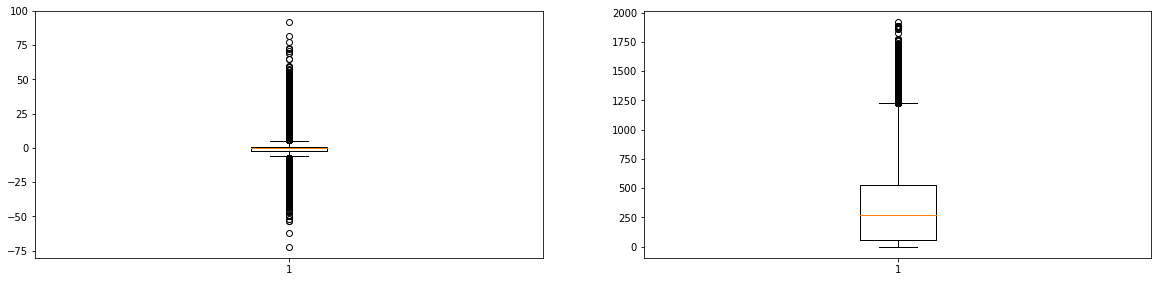

In [274]:
# Checking for Outliers (fifa1) fifa rankinggs dataset
#
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
plt.boxplot(x = fifa['rank_change'])
plt.subplot(2,2,2)
plt.boxplot(x = fifa['previous_points'])
plt.show()

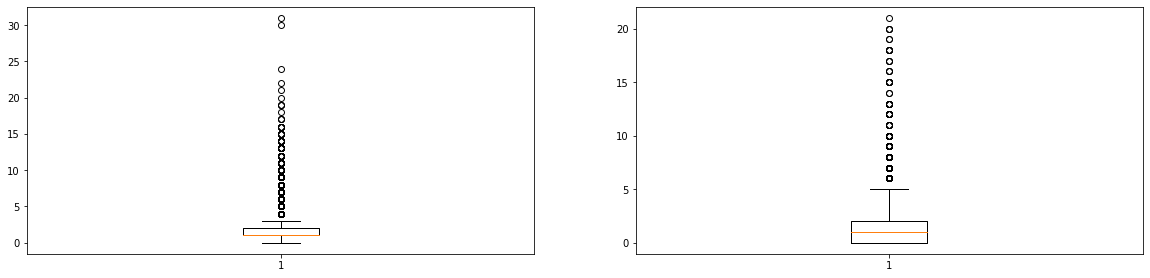

In [275]:
#Checking for Outliers (fifa1) fifa results dataset
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
plt.boxplot(x = fifa1['home_score'])
plt.subplot(2,2,2)
plt.boxplot(x = fifa1['away_score'])
plt.show()

#### Results

> The fifa ranking data set has outliers on the points section as the was a change in assigninng of points in different year intervals so it is important that we work with a specific interval to help feed the model with tht appropriate data trends

Text(0.5, 1.0, 'home_score VS away_score')

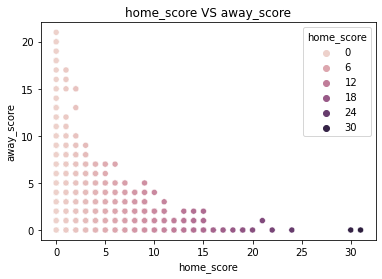

In [276]:
# Checking for Anomalies on the fifa games results fifa1 dataset
#
ax = sns.scatterplot(data = fifa1, x = 'home_score', y = 'away_score', hue ='home_score')
ax.set_title('home_score VS away_score' )





> We compared the home goals and away goals to see if there was any exeggeration in the relationships but there was not much of a disparity.

#### Missing Values

In [277]:
# Identifying the Missing Data
#
def miss(data):
    missing = data.isnull().sum().sort_values(ascending= False)
    percentage = (data.isnull().sum()/len(data)).sort_values(ascending= False)
    miss_perc = pd.DataFrame({'Missing Values':0 ,'Percentage':percentage })

    return miss_perc

In [278]:
miss(fifa)

,Missing Values,Percentage
rank,0,0.0
country_full,0,0.0
country_abrv,0,0.0
total_points,0,0.0
previous_points,0,0.0
rank_change,0,0.0
cur_year_avg,0,0.0
cur_year_avg_weighted,0,0.0
last_year_avg,0,0.0
last_year_avg_weighted,0,0.0


In [279]:
miss(fifa1)

,Missing Values,Percentage
date,0,0.0
home_team,0,0.0
away_team,0,0.0
home_score,0,0.0
away_score,0,0.0
tournament,0,0.0
city,0,0.0
country,0,0.0
neutral,0,0.0


> We opted to confirm if therev were null values in the datasets thereby defining a function to do so but there were no Null values

In [280]:
# Fifa 
fifa.duplicated().sum()

37

In [281]:
# Dealing with the Missing Data
#
fifa.dropna
fifa1.dropna


<bound method DataFrame.dropna of              date         home_team        away_team  home_score  away_score  \
0      1872-11-30          Scotland          England           0           0   
1      1873-03-08           England         Scotland           4           2   
2      1874-03-07          Scotland          England           2           1   
3      1875-03-06           England         Scotland           2           2   
4      1876-03-04          Scotland          England           3           0   
...           ...               ...              ...         ...         ...   
40834  2019-07-18    American Samoa           Tahiti           8           1   
40835  2019-07-18              Fiji  Solomon Islands           4           4   
40836  2019-07-19           Senegal          Algeria           0           1   
40837  2019-07-19        Tajikistan      North Korea           0           1   
40838  2019-07-20  Papua New Guinea             Fiji           1           1   

     

In [282]:
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

#### DateTime

In [283]:
# Converting the rankings date to datetime from intergers
fifa['rank_date'] = pd.to_datetime(fifa['rank_date'])

In [284]:
# Confirming the column names
fifa1.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [285]:
# Converting the rankings date to datetime from intergers
fifa1['date'] = pd.to_datetime(fifa1['date'])

In [286]:
# Confirming to see if the changes have been innitialised
fifa.dtypes

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

In [287]:
# Confirming to see if the changes have been innitialised
fifa1.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [288]:
fifa

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


#### More Cleaning to remain with relevant data

In [289]:
# More data cleaning procedures
# Dropping unwanted columns

In [290]:
# More data cleaning procedures
# Dropping unwanted columns thta contain the old Fifa ranking system as we decided to work with the new ranking data which was innitiated in 2011


fifa_new = fifa.iloc[ 40379: ,:]
fifa_new


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
40379,1,Netherlands,NED,1596.13,1542,1,748.05,748.05,976.46,488.23,740.63,222.19,688.31,137.66,UEFA,2011-08-24
40380,2,Spain,ESP,1563.45,1588,-1,589.59,589.59,1074.04,537.02,796.81,239.04,989.00,197.80,UEFA,2011-08-24
40381,3,Germany,GER,1329.86,1305,0,617.83,617.83,860.14,430.07,504.02,151.21,653.74,130.75,UEFA,2011-08-24
40382,4,England,ENG,1176.88,1146,2,588.08,588.08,620.77,310.38,629.50,188.85,447.85,89.57,UEFA,2011-08-24
40383,5,Uruguay,URU,1174.34,1156,0,599.26,599.26,756.29,378.15,415.70,124.71,361.09,72.22,CONMEBOL,2011-08-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.00,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.00,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.00,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,2018-06-07
57791,206,Somalia,SOM,0.00,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,2018-06-07


In [291]:
fifa_new.reset_index(drop = True, inplace= True)

In [292]:
# Affirming our changes
fifa_new

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Netherlands,NED,1596.13,1542,1,748.05,748.05,976.46,488.23,740.63,222.19,688.31,137.66,UEFA,2011-08-24
1,2,Spain,ESP,1563.45,1588,-1,589.59,589.59,1074.04,537.02,796.81,239.04,989.00,197.80,UEFA,2011-08-24
2,3,Germany,GER,1329.86,1305,0,617.83,617.83,860.14,430.07,504.02,151.21,653.74,130.75,UEFA,2011-08-24
3,4,England,ENG,1176.88,1146,2,588.08,588.08,620.77,310.38,629.50,188.85,447.85,89.57,UEFA,2011-08-24
4,5,Uruguay,URU,1174.34,1156,0,599.26,599.26,756.29,378.15,415.70,124.71,361.09,72.22,CONMEBOL,2011-08-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,206,Anguilla,AIA,0.00,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONCACAF,2018-06-07
17410,206,Bahamas,BAH,0.00,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONCACAF,2018-06-07
17411,206,Eritrea,ERI,0.00,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,2018-06-07
17412,206,Somalia,SOM,0.00,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,2018-06-07


In [293]:
# More data cleaning procedures
# Dropping unwanted columns thta contain the old Fifa results as we decided to match the data on the ranking dataset
fifa1_new = fifa1.iloc[ 33291: ,:]
fifa1_new

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
33291,2011-08-28,Antigua and Barbuda,Saint Vincent and the Grenadines,2,2,Friendly,Osbourn,Antigua and Barbuda,False
33292,2011-08-30,American Samoa,Solomon Islands,0,4,Pacific Games,Nouméa,New Caledonia,True
33293,2011-08-30,Fiji,Kiribati,9,0,Pacific Games,Boulari,New Caledonia,True
33294,2011-08-30,New Caledonia,Guam,9,0,Pacific Games,Nouméa,New Caledonia,False
33295,2011-08-30,Tahiti,Cook Islands,7,0,Pacific Games,Boulari,New Caledonia,True
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


In [294]:
# Affirming our changes
fifa1_new

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
33291,2011-08-28,Antigua and Barbuda,Saint Vincent and the Grenadines,2,2,Friendly,Osbourn,Antigua and Barbuda,False
33292,2011-08-30,American Samoa,Solomon Islands,0,4,Pacific Games,Nouméa,New Caledonia,True
33293,2011-08-30,Fiji,Kiribati,9,0,Pacific Games,Boulari,New Caledonia,True
33294,2011-08-30,New Caledonia,Guam,9,0,Pacific Games,Nouméa,New Caledonia,False
33295,2011-08-30,Tahiti,Cook Islands,7,0,Pacific Games,Boulari,New Caledonia,True
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


#### Results

We dropped the columns before 2011 as the werre the reasons we had a lot of anomalies as the points assigning procedure differeed from the new system therefore it would result to widening the error on our model

Therefore we used data from June 2011 when the new system was introduced in order to help predict relevant trends while we design our model

#### Creating new Columns from innitial ones

In [295]:
# Creating a new column called status that will be used as an independent variable in predicting the odds of match outrcomes when at home or away or on neutral grounds and the rank of various teams
fifa1_new['Status'] = fifa1_new['home_score'] - fifa1_new['away_score'] 
fifa1_new['Status']

C:\Users\hp\AppData\Local\Temp/ipykernel_12784/2806088773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa1_new['Status'] = fifa1_new['home_score'] - fifa1_new['away_score']


33291    0
33292   -4
33293    9
33294    9
33295    7
        ..
40834    7
40835    0
40836   -1
40837   -1
40838    0
Name: Status, Length: 7548, dtype: int64

In [296]:
fifa1_new

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status
33291,2011-08-28,Antigua and Barbuda,Saint Vincent and the Grenadines,2,2,Friendly,Osbourn,Antigua and Barbuda,False,0
33292,2011-08-30,American Samoa,Solomon Islands,0,4,Pacific Games,Nouméa,New Caledonia,True,-4
33293,2011-08-30,Fiji,Kiribati,9,0,Pacific Games,Boulari,New Caledonia,True,9
33294,2011-08-30,New Caledonia,Guam,9,0,Pacific Games,Nouméa,New Caledonia,False,9
33295,2011-08-30,Tahiti,Cook Islands,7,0,Pacific Games,Boulari,New Caledonia,True,7
...,...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,7
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,0
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,-1
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,-1


In [297]:
fifa1_new.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
Status                 int64
dtype: object

In [298]:
# We had to define a function to help come up with a new column that showed if the match outcomes were a loss or a draw or a win 

def stats(fifa1_new):
    column1 = []
    for i in fifa1_new['Status']:
        if i == 0:
            column1.append('D')
        elif i >= 1:
            column1.append('W')
        elif i <= -1:
            column1.append('L')
    return column1 
        
        


In [299]:
# The column was tranformed to a data set to be merged with the main fifa results dataset
X = stats(fifa1_new)
new_col = pd.DataFrame(X)

In [300]:
new_col1 = new_col.rename( columns= {0 : 'Status'})  
new_col1

,Status
0,D
1,L
2,W
3,W
4,W
...,...
7543,W
7544,D
7545,L
7546,L


In [301]:
fifa1_new.reset_index(drop = True, inplace= True)


In [302]:
fifa1_new

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status
0,2011-08-28,Antigua and Barbuda,Saint Vincent and the Grenadines,2,2,Friendly,Osbourn,Antigua and Barbuda,False,0
1,2011-08-30,American Samoa,Solomon Islands,0,4,Pacific Games,Nouméa,New Caledonia,True,-4
2,2011-08-30,Fiji,Kiribati,9,0,Pacific Games,Boulari,New Caledonia,True,9
3,2011-08-30,New Caledonia,Guam,9,0,Pacific Games,Nouméa,New Caledonia,False,9
4,2011-08-30,Tahiti,Cook Islands,7,0,Pacific Games,Boulari,New Caledonia,True,7
...,...,...,...,...,...,...,...,...,...,...
7543,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,7
7544,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,0
7545,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,-1
7546,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,-1


In [303]:
# The data set was then merged with the original dataset
fifa1_up = pd.merge(fifa1_new, new_col1, left_index= True, right_index= True )
fifa1_up

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_x,Status_y
0,2011-08-28,Antigua and Barbuda,Saint Vincent and the Grenadines,2,2,Friendly,Osbourn,Antigua and Barbuda,False,0,D
1,2011-08-30,American Samoa,Solomon Islands,0,4,Pacific Games,Nouméa,New Caledonia,True,-4,L
2,2011-08-30,Fiji,Kiribati,9,0,Pacific Games,Boulari,New Caledonia,True,9,W
3,2011-08-30,New Caledonia,Guam,9,0,Pacific Games,Nouméa,New Caledonia,False,9,W
4,2011-08-30,Tahiti,Cook Islands,7,0,Pacific Games,Boulari,New Caledonia,True,7,W
...,...,...,...,...,...,...,...,...,...,...,...
7543,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,7,W
7544,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,0,D
7545,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,-1,L
7546,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,-1,L


In [304]:
fifa1_up = fifa1_up.drop(['Status_x'], axis = 1)

In [305]:
# tHe dataset with the new column was the updated to fifa1_up
fifa1_up

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_y
0,2011-08-28,Antigua and Barbuda,Saint Vincent and the Grenadines,2,2,Friendly,Osbourn,Antigua and Barbuda,False,D
1,2011-08-30,American Samoa,Solomon Islands,0,4,Pacific Games,Nouméa,New Caledonia,True,L
2,2011-08-30,Fiji,Kiribati,9,0,Pacific Games,Boulari,New Caledonia,True,W
3,2011-08-30,New Caledonia,Guam,9,0,Pacific Games,Nouméa,New Caledonia,False,W
4,2011-08-30,Tahiti,Cook Islands,7,0,Pacific Games,Boulari,New Caledonia,True,W
...,...,...,...,...,...,...,...,...,...,...
7543,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,W
7544,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,D
7545,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,L
7546,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,L


In [306]:
# On our Fifarankings dataset we dropped the colmns on averages from initial years 
fifa_up = fifa_new.drop(['cur_year_avg','last_year_avg','previous_points','last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg' , 'three_year_ago_weighted'], axis = 1)
fifa_up

,rank,country_full,country_abrv,total_points,rank_change,cur_year_avg_weighted,confederation,rank_date
0,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24
1,2,Spain,ESP,1563.45,-1,589.59,UEFA,2011-08-24
2,3,Germany,GER,1329.86,0,617.83,UEFA,2011-08-24
3,4,England,ENG,1176.88,2,588.08,UEFA,2011-08-24
4,5,Uruguay,URU,1174.34,0,599.26,CONMEBOL,2011-08-24
...,...,...,...,...,...,...,...,...
17409,206,Anguilla,AIA,0.00,1,0.00,CONCACAF,2018-06-07
17410,206,Bahamas,BAH,0.00,1,0.00,CONCACAF,2018-06-07
17411,206,Eritrea,ERI,0.00,1,0.00,CAF,2018-06-07
17412,206,Somalia,SOM,0.00,1,0.00,CAF,2018-06-07


#### Results

> We remained with two datasets with enough information to perfom Exploratory Analysis and Regression techniques

### Merging Our DataSets

In [307]:
# We merged our fifa rankings data set to the fifa results data set by country and home team
set_fifa= pd.merge(fifa_up, fifa1_up, left_on = 'country_full', right_on= 'home_team')
set_fifa

,rank,country_full,country_abrv,total_points,rank_change,cur_year_avg_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_y
0,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24,2011-09-02,Netherlands,San Marino,11,0,UEFA Euro qualification,Eindhoven,Netherlands,False,W
1,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24,2011-10-07,Netherlands,Moldova,1,0,UEFA Euro qualification,Rotterdam,Netherlands,False,W
2,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24,2011-11-11,Netherlands,Switzerland,0,0,Friendly,Amsterdam,Netherlands,False,D
3,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24,2012-05-26,Netherlands,Bulgaria,1,2,Friendly,Amsterdam,Netherlands,False,L
4,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24,2012-05-30,Netherlands,Slovakia,2,0,Friendly,Rotterdam,Netherlands,False,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547380,195,Gibraltar,GIB,34.16,1,34.16,UEFA,2018-06-07,2018-09-06,Gibraltar,North Macedonia,0,2,UEFA Nations League,Gibraltar,Gibraltar,False,L
547381,195,Gibraltar,GIB,34.16,1,34.16,UEFA,2018-06-07,2018-10-16,Gibraltar,Liechtenstein,2,1,UEFA Nations League,Gibraltar,Gibraltar,False,W
547382,195,Gibraltar,GIB,34.16,1,34.16,UEFA,2018-06-07,2018-11-16,Gibraltar,Armenia,2,6,UEFA Nations League,Gibraltar,Gibraltar,False,L
547383,195,Gibraltar,GIB,34.16,1,34.16,UEFA,2018-06-07,2019-03-23,Gibraltar,Republic of Ireland,0,1,UEFA Euro qualification,Gibraltar,Gibraltar,False,L


In [308]:
# set_fifa.to_csv(r'C:\Users\hp\Documents\Karamoja Docs\ newer_set.csv')

## 6. Exploratory Analysis

### Univariate & Bivariate Analysis

In [309]:
# Ploting the univariate summaries and recording our observations
# 
fifa_up.head(5)

,rank,country_full,country_abrv,total_points,rank_change,cur_year_avg_weighted,confederation,rank_date
0,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24
1,2,Spain,ESP,1563.45,-1,589.59,UEFA,2011-08-24
2,3,Germany,GER,1329.86,0,617.83,UEFA,2011-08-24
3,4,England,ENG,1176.88,2,588.08,UEFA,2011-08-24
4,5,Uruguay,URU,1174.34,0,599.26,CONMEBOL,2011-08-24


In [310]:
fifa1_up.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_y
0,2011-08-28,Antigua and Barbuda,Saint Vincent and the Grenadines,2,2,Friendly,Osbourn,Antigua and Barbuda,False,D
1,2011-08-30,American Samoa,Solomon Islands,0,4,Pacific Games,Nouméa,New Caledonia,True,L
2,2011-08-30,Fiji,Kiribati,9,0,Pacific Games,Boulari,New Caledonia,True,W
3,2011-08-30,New Caledonia,Guam,9,0,Pacific Games,Nouméa,New Caledonia,False,W
4,2011-08-30,Tahiti,Cook Islands,7,0,Pacific Games,Boulari,New Caledonia,True,W


In [311]:
set_fifa.head(5)

,rank,country_full,country_abrv,total_points,rank_change,cur_year_avg_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_y
0,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24,2011-09-02,Netherlands,San Marino,11,0,UEFA Euro qualification,Eindhoven,Netherlands,False,W
1,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24,2011-10-07,Netherlands,Moldova,1,0,UEFA Euro qualification,Rotterdam,Netherlands,False,W
2,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24,2011-11-11,Netherlands,Switzerland,0,0,Friendly,Amsterdam,Netherlands,False,D
3,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24,2012-05-26,Netherlands,Bulgaria,1,2,Friendly,Amsterdam,Netherlands,False,L
4,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24,2012-05-30,Netherlands,Slovakia,2,0,Friendly,Rotterdam,Netherlands,False,W


#### Central Tendency

In [312]:
central_tendency = fifa_up.groupby(['country_full'])['total_points'].describe()
central_tendency.head()

,count,mean,std,min,25%,50%,75%,max
country_full,,,,,,,,
Afghanistan,83.0,169.633976,49.813019,39.27,143.440,183.62,208.675,227.29
Albania,83.0,573.628795,105.461041,383.81,496.945,557.30,623.305,888.29
Algeria,83.0,755.947108,126.433596,473.83,680.020,742.56,845.370,989.10
American Samoa,83.0,49.579880,38.345702,0.00,18.210,38.25,63.750,144.50
Andorra,83.0,42.238193,75.310331,0.00,7.580,11.40,16.120,246.42


In [313]:
points = fifa_up.groupby(['country_full'])
points
series = points['total_points'].mean().sort_values( ascending = False).head(20)

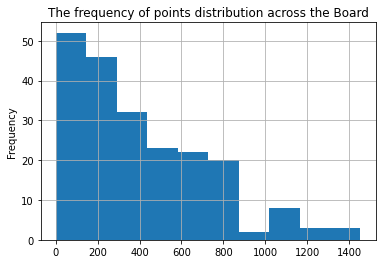

In [374]:
series1 = points['total_points'].mean().sort_values(ascending = False)
series1.plot(kind = 'hist')
plt.title('The frequency of points distribution across the Board')
plt.grid()
plt.show()

> Majority of the teams had points ranging from 50 to 200
> The top shelf teams had points as high as 1000 to 1400 and they were the ones that mostly participated for the world cup tournament

> There is no normal distribution in the points attained by these teams as there is great deal of disparity

In [315]:
# Selecting goals scored away 
away = fifa1_up['away_score']
away

0       2
1       4
2       0
3       0
4       0
       ..
7543    1
7544    4
7545    1
7546    1
7547    1
Name: away_score, Length: 7548, dtype: int64

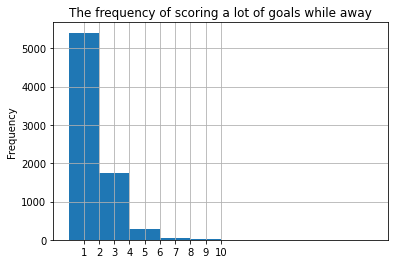

In [316]:
away.plot(kind = 'hist')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.title('The frequency of scoring a lot of goals while away')
plt.grid()
plt.show()

In [317]:
# Sorting teams by home_score
country = fifa1_up.groupby(['home_team'])
sort = country['home_score'].sum().sort_values( ascending = False).head(20)
sort

home_team
Japan                   164
United States           153
France                  151
Spain                   150
Brazil                  150
Germany                 149
Qatar                   145
Belgium                 139
Iran                    126
United Arab Emirates    125
Mexico                  122
Egypt                   117
South Korea             115
Portugal                114
Australia               111
Morocco                 109
Netherlands             109
Russia                  109
Algeria                 104
Thailand                104
Name: home_score, dtype: int64

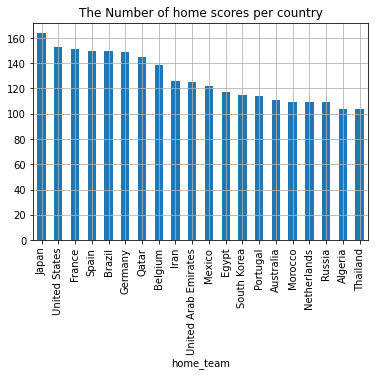

In [318]:
sort.plot(kind = 'bar')
plt.title('The Number of home scores per country')
plt.grid()
plt.show()

### Japan leads with the number of goals scored at home but it has average points when it comes to the total points awarded per team

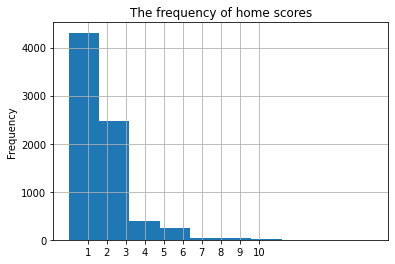

In [319]:

home = fifa1_up['home_score']

home
home.plot(kind = 'hist')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.title('The frequency of home scores')
plt.grid()

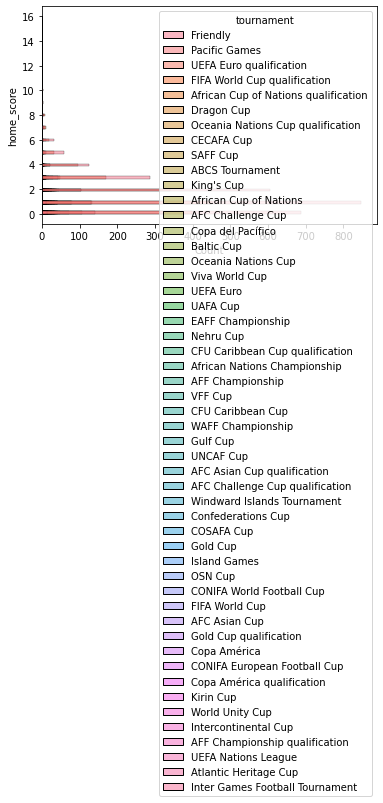

In [320]:
ax = sns.histplot(y = fifa1_up['home_score'], hue = fifa1_up['tournament'])


> There are chances of a team scoring more than one goal while at home but there are instances where some teams excede to scoring more than even 10 goals but mostly in friendly matches 

Text(0.5, 1.0, 'Top Five Fifa Rankings by percentage')

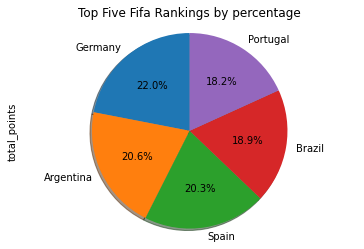

In [321]:
series_a = points['total_points'].mean().sort_values( ascending = False).head(5)
series_a.plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, startangle =90)

plt.axis('equal')
plt.title('Top Five Fifa Rankings by percentage')

> For the past Decade the top five percentage share goes to Germany topping the list fllowed by Argentina, Spain, Brazil, Portugal 

> They have maintained high points in their respective federations and also are quite competetive in FIFA world Cup always gettig to the quarter finals

In [322]:
setter = set_fifa.groupby(['tournament'])
setter
new = setter['home_score'].sum().sort_values( ascending = False).head(20)
new




tournament
Friendly                                302666
FIFA World Cup qualification            192712
UEFA Euro qualification                  58954
African Cup of Nations qualification     47357
African Nations Championship             22165
AFC Asian Cup qualification              20916
UEFA Nations League                      15493
AFF Championship                         14525
African Cup of Nations                   14424
FIFA World Cup                           13446
COSAFA Cup                               13031
CFU Caribbean Cup qualification          12284
CECAFA Cup                               12163
Pacific Games                            10945
Gold Cup                                 10126
Copa América                              9213
SAFF Cup                                  8632
UEFA Euro                                 8300
AFC Asian Cup                             7387
EAFF Championship                         6972
Name: home_score, dtype: int64

<AxesSubplot:xlabel='tournament'>

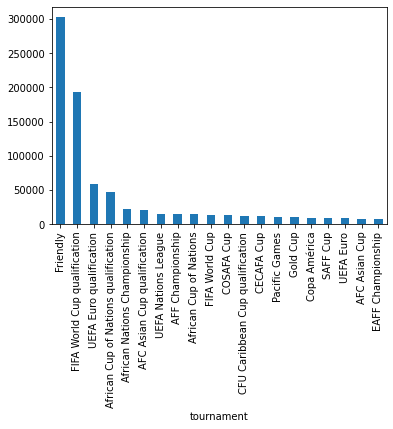

In [323]:
new.plot(kind = 'bar')

> Pertaining to the previous results Friendly matches are the ones where there is the highest number of goals scored 

> The world cup has below moderate amount of goals scored as it is competitive and they are heald once in four years 

In [324]:
set_fifa.head(5)

,rank,country_full,country_abrv,total_points,rank_change,cur_year_avg_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_y
0,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24,2011-09-02,Netherlands,San Marino,11,0,UEFA Euro qualification,Eindhoven,Netherlands,False,W
1,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24,2011-10-07,Netherlands,Moldova,1,0,UEFA Euro qualification,Rotterdam,Netherlands,False,W
2,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24,2011-11-11,Netherlands,Switzerland,0,0,Friendly,Amsterdam,Netherlands,False,D
3,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24,2012-05-26,Netherlands,Bulgaria,1,2,Friendly,Amsterdam,Netherlands,False,L
4,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24,2012-05-30,Netherlands,Slovakia,2,0,Friendly,Rotterdam,Netherlands,False,W


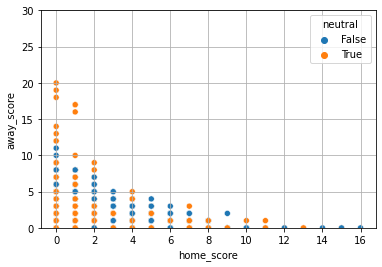

In [325]:
# Plotting relationship between away score and home score in comparison to neutrality of the venue of the match 
ax = sns.scatterplot(data = fifa1_up,x = 'home_score', y ='away_score', hue = 'neutral' )
ax.set(ylim = (0,30))
ax.grid()


> This multivariate analysis indicates that games played in neutral grounds are likely to end up a draw of (0-0) and there are more chances of the home team winning by scoring more goals when a team is at home

### Conclusion

**> There is Teams with more goals are not necesarrily theones with higher FIFA rankings** 

**> The Friendly matches have higher chances of teams scoring multiple goals**

**> The teams with the highest Ranking is Germany followed by  Argentina, Brazil,Spain and finally Portugal calculating their mean over the past decade**

**> It is also logic that all the above mentioned teams have been in all of the world cup tournaments and in the year 2012 Germany won the cup againsty Argentina and Brazil won the cup in the year 2002**

**> South American leagues seem to have lower chances of scoring goals compared to other leagues**

**> Europe has the most teams in the top 10 fifa ranking**

**> The are higher chances of scoring more goals while at home than while away**

In [326]:
set_fifa.drop_duplicates(inplace= True)

## 7. Implementing the Solution

#### Encoding

In [327]:
# Installing encoders to ecode my New status column to help with the modeling 
!pip install category_encoders

You should consider upgrading via the 'C:\Users\hp\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [328]:
import category_encoders as ce

In [329]:
# Instantiate our encoder

encoder = ce.OneHotEncoder(cols = 'Status_y', use_cat_names = True)

In [330]:
# We therefore train the sample amount of data that we intend to encode its columns then test the other colums to assert its functionality 
from sklearn.model_selection import train_test_split

In [331]:
train, test = train_test_split(set_fifa, random_state = 547385)

In [332]:
train_encoded = encoder.fit_transform(train)

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [333]:
# Confirming that our encoding on the column worked 

train_encoded.head(5)

,rank,country_full,country_abrv,total_points,rank_change,cur_year_avg_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_y_L,Status_y_W,Status_y_D
101765,40,Paraguay,PAR,713.79,-4,390.68,CONMEBOL,2017-07-06,2017-09-05,Paraguay,Uruguay,1,2,FIFA World Cup qualification,Asunción,Paraguay,False,1,0,0
290118,65,Uzbekistan,UZB,497.68,-7,192.07,AFC,2014-10-23,2016-11-10,Uzbekistan,Jordan,1,0,Friendly,Tashkent,Uzbekistan,False,0,1,0
171301,52,South Africa,RSA,587.27,0,321.81,CAF,2015-01-08,2019-06-07,South Africa,Malawi,0,0,COSAFA Cup,Durban,South Africa,False,0,0,1
279788,101,Finland,FIN,337.01,-17,35.53,UEFA,2016-10-20,2012-06-03,Finland,Latvia,1,1,Baltic Cup,Võru,Estonia,True,0,0,1
51239,84,Norway,NOR,418.03,-1,143.25,UEFA,2017-01-12,2011-10-11,Norway,Cyprus,3,1,UEFA Euro qualification,Oslo,Norway,False,0,1,0


In [334]:
# Testing it on the test sample
test_encoded = encoder.transform(test)
test_encoded.head()

,rank,country_full,country_abrv,total_points,rank_change,cur_year_avg_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_y_L,Status_y_W,Status_y_D
382341,161,Guyana,GUY,143.91,-9,119.17,CONCACAF,2015-12-03,2011-09-02,Guyana,Barbados,2,0,FIFA World Cup qualification,Providence,Guyana,False,0,1,0
228752,94,Libya,LBY,345.36,2,112.37,CAF,2015-08-06,2016-11-11,Libya,Tunisia,0,1,FIFA World Cup qualification,Algiers,Algeria,True,1,0,0
21356,6,Brazil,BRA,1142.60,0,417.86,CONMEBOL,2011-12-21,2013-06-22,Brazil,Italy,4,2,Confederations Cup,Salvador,Brazil,False,0,1,0
89839,25,Australia,AUS,778.06,-1,335.10,AFC,2012-09-05,2014-09-08,Australia,Saudi Arabia,3,2,Friendly,London,England,True,0,1,0
384050,77,Haiti,HAI,467.36,-4,222.98,CONCACAF,2015-12-03,2012-11-14,Haiti,Guyana,1,0,CFU Caribbean Cup qualification,St. George's,Grenada,True,0,1,0


In [335]:
set_fifa.head()

,rank,country_full,country_abrv,total_points,rank_change,cur_year_avg_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_y
0,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24,2011-09-02,Netherlands,San Marino,11,0,UEFA Euro qualification,Eindhoven,Netherlands,False,W
1,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24,2011-10-07,Netherlands,Moldova,1,0,UEFA Euro qualification,Rotterdam,Netherlands,False,W
2,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24,2011-11-11,Netherlands,Switzerland,0,0,Friendly,Amsterdam,Netherlands,False,D
3,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24,2012-05-26,Netherlands,Bulgaria,1,2,Friendly,Amsterdam,Netherlands,False,L
4,1,Netherlands,NED,1596.13,1,748.05,UEFA,2011-08-24,2012-05-30,Netherlands,Slovakia,2,0,Friendly,Rotterdam,Netherlands,False,W


In [336]:
# Implementing the Solution
#We then use dummies to encode the neutral column 
# 
new_neutral = pd.get_dummies(train_encoded['neutral'], drop_first = True) 
new_neutral

,True
101765,0
290118,0
171301,0
279788,1
51239,0
...,...
283216,0
392019,0
123804,0
313524,1


In [337]:
# new_status = pd.get_dummies(set_fifa['Status_y'], drop_first = True)
# new_status.head()

In [338]:
# set_fifa.drop(['Status_y','neutral'], axis = 1, inplace = True)
# set_fifa.head()

In [339]:
# We then merge the encoded dataset with the status column encoded to the neutral column 
fifa_set = pd.concat([train_encoded,new_neutral], axis = 1)
fifa_set.head(5)

,rank,country_full,country_abrv,total_points,rank_change,cur_year_avg_weighted,confederation,rank_date,date,home_team,...,home_score,away_score,tournament,city,country,neutral,Status_y_L,Status_y_W,Status_y_D,True
101765,40,Paraguay,PAR,713.79,-4,390.68,CONMEBOL,2017-07-06,2017-09-05,Paraguay,...,1,2,FIFA World Cup qualification,Asunción,Paraguay,False,1,0,0,0
290118,65,Uzbekistan,UZB,497.68,-7,192.07,AFC,2014-10-23,2016-11-10,Uzbekistan,...,1,0,Friendly,Tashkent,Uzbekistan,False,0,1,0,0
171301,52,South Africa,RSA,587.27,0,321.81,CAF,2015-01-08,2019-06-07,South Africa,...,0,0,COSAFA Cup,Durban,South Africa,False,0,0,1,0
279788,101,Finland,FIN,337.01,-17,35.53,UEFA,2016-10-20,2012-06-03,Finland,...,1,1,Baltic Cup,Võru,Estonia,True,0,0,1,1
51239,84,Norway,NOR,418.03,-1,143.25,UEFA,2017-01-12,2011-10-11,Norway,...,3,1,UEFA Euro qualification,Oslo,Norway,False,0,1,0,0


#### Result

> We encoded the columns in order to change the data into binnary digits that are easily understood by the machine for machine learning procedure 

> Use of catogorical data can sometimes impair the design of the model 

> We used it on the status and neutaral column that had only 2 and 3 unique values

<AxesSubplot:>

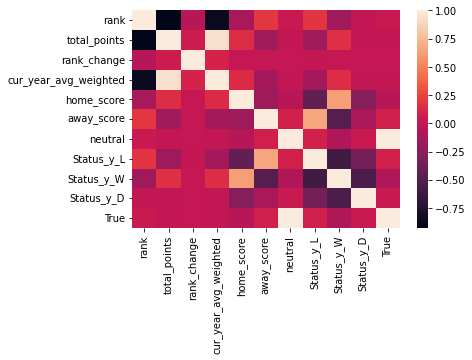

In [340]:
# Using heatmap to determine relationship between various variables before we perfom the regressions 

sns.heatmap(fifa_set.corr())

In [341]:
# We randomly select the sample of rows we intend to use for our model 

new = fifa_set.sample(7548)
new

,rank,country_full,country_abrv,total_points,rank_change,cur_year_avg_weighted,confederation,rank_date,date,home_team,...,home_score,away_score,tournament,city,country,neutral,Status_y_L,Status_y_W,Status_y_D,True
106562,50,Slovakia,SVK,588.24,4,312.35,UEFA,2014-03-13,2013-03-22,Slovakia,...,1,1,FIFA World Cup qualification,Žilina,Slovakia,False,0,0,1,0
294776,115,Latvia,LVA,287.66,4,147.60,UEFA,2013-09-12,2017-06-12,Latvia,...,1,2,Friendly,Riga,Latvia,False,1,0,0,0
485918,145,Lebanon,LIB,214.57,-5,114.82,AFC,2016-03-03,2013-10-15,Lebanon,...,1,1,AFC Asian Cup qualification,Beirut,Lebanon,False,0,0,1,0
401653,35,Iceland,ISL,775.58,2,471.39,UEFA,2015-03-12,2015-06-12,Iceland,...,2,1,UEFA Euro qualification,Reykjavík,Iceland,False,0,1,0,0
76644,51,Montenegro,MNE,585.48,-1,151.37,UEFA,2012-02-15,2017-09-04,Montenegro,...,1,0,FIFA World Cup qualification,Podgorica,Montenegro,False,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270939,78,Zambia,ZAM,417.66,10,153.15,CAF,2014-10-23,2012-02-04,Zambia,...,3,0,African Cup of Nations,Bata,Equatorial Guinea,True,0,1,0,1
192017,51,Cameroon,CMR,607.67,-6,224.64,CAF,2018-02-15,2018-05-27,Cameroon,...,0,1,Friendly,Beauvais,France,True,1,0,0,1
3816,21,Netherlands,NED,963.54,0,502.07,UEFA,2018-03-15,2014-10-10,Netherlands,...,3,1,UEFA Euro qualification,Amsterdam,Netherlands,False,0,1,0,0
181162,27,Senegal,SEN,837.98,1,368.23,CAF,2018-06-07,2015-01-13,Senegal,...,5,2,Friendly,Casablanca,Morocco,True,0,1,0,1


In [342]:
new.to_csv(r'C:\Users\hp\Documents\Karamoja Docs\ latest.csv')

In [343]:
# Assign the variables gfor logistic regression
X = new[['home_score', 'away_score', 'rank','total_points']]
y = new[['Status_y_L']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=1000)



In [344]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [345]:
# Using the trained and test samples to predict the future outcome
y_pred = LogReg.predict(X_test)

In [346]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1612,    0],
       [   0,  653]], dtype=int64)

### result

> The prediction on losseswas over fitting which implies that my regression technique was flawed (status_y_L)

In [347]:
X1 = new[['home_score', 'away_score', 'rank','total_points']]
y1 = new[['Status_y_D']]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = .3, random_state=1000)

# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X1_train, y1_train)


y1_pred = LogReg.predict(X1_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y1_pred)
confusion_matrix



C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[1718,    0],
       [ 365,  182]], dtype=int64)

In [ ]:
#### Results

> My prediction model gave me more 1718, 182 values that were accurate predictions leaving only 365  in accurate ones

> I intend to improve the model with trying out other regression methods 

In [361]:
X2 = new[['home_score', 'away_score', 'rank','total_points']]
y2 = new[['Status_y_W']]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .3, random_state=1000)

# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X2_train, y2_train)


y2_pred = LogReg.predict(X2_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y2_test, y2_pred)
confusion_matrix


C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[1200,    0],
       [   0, 1065]], dtype=int64)

#### Results

> The prediction on wins was over fitting which implies that my regression technique was flawed status_y_W

In [349]:
from sklearn import metrics

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [350]:
from sklearn import metrics

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

Mean Absolute Error: 0.16114790286975716
Mean Squared Error: 0.16114790286975716
Root Mean Squared Error: 0.4014323141823004


In [351]:
from sklearn import metrics

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


#### Results

> The logregression technique gave me over fitting results except for the Chances of drawing in a match status_y_D

In [ ]:
X1 = new[['home_score', 'away_score', 'rank','total_points']]
y1 = new['Status_y_D']

from sklearn.preprocessing import StandardScaler

X1 = StandardScaler().fit_transform(X1)
X1

array([[ 0.31092646, -0.85522269, -0.2939101 , -0.05182032],
       [-1.01088313, -0.85522269,  1.28662358, -1.0091804 ],
       [-1.01088313, -0.85522269, -0.89342288,  0.63127722],
       ...,
       [-1.01088313, -0.85522269,  0.16026624, -0.40899345],
       [-1.01088313, -0.04882408,  0.16026624, -0.41942875],
       [ 0.31092646, -0.85522269,  0.94144956, -0.91509117]])

### Reducing my X1_train values using PCA then plotting (Status_y_D) Prediction on chances of a match ending up as a draw

In [ ]:
# Standidizing my x values and reducing them to one column then perfoming a PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 1)
components = pca.fit_transform(X1)

components = pd.DataFrame(components)
print(components.shape)
components.head()


(7548, 1)


,0
0,-0.449013
1,1.536652
2,-1.005248
3,-2.841036
4,0.566859


In [ ]:
# Renaming the column created in order to merge with my y trained dataset
components = components.rename(columns= {0: 'PCA1'})
components

,PCA1
0,-0.449013
1,1.536652
2,-1.005248
3,-2.841036
4,0.566859
...,...
7543,0.687273
7544,0.467193
7545,0.387528
7546,0.599724


In [ ]:
# Y trained dataset 

ypred = new['Status_y_D']
ypred = pd.DataFrame(ypred)
ypred.head(5)

,Status_y_D
50589,0
518273,1
212130,1
11650,0
294301,0


In [ ]:
# Mergin the two datasets

merger = pd.merge(components, ypred, left_index= True, right_index=True)
merger

,PCA1,Status_y_D
33,0.874531,0
99,0.351937,0
101,1.865185,0
207,-2.043226,1
268,1.851849,0
...,...,...
7209,2.511693,0
7280,1.158531,0
7386,0.157356,0
7433,1.311612,0


In [ ]:
X1 = merger['PCA1'].values.reshape(-1, 1)
y1 = merger['Status_y_D'].values

pcaX1_train, pcaX1_test, qualityX1_train, qualityX1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [353]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(pcaX1_train,qualityX1_train)

print(logreg.intercept_)

print(logreg.coef_)

[-1.58021785]
[[-0.16220451]]


In [364]:
quality_predX1 = logreg.predict(pcaX1_test)
comparison_frame = pd.DataFrame({'Actual': qualityX1_test.flatten(), 'Prediction': quality_predX1.flatten()})

comparison_frame.describe()
print(comparison_frame.head())

   Actual  Prediction
0       0           0
1       1           0
2       0           0
3       0           0
4       0           0


In [372]:
from sklearn import metrics

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(qualityX1_test, quality_predX1))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(qualityX1_test, quality_predX1))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(qualityX1_test, quality_predX1)))

Mean Absolute Error: 0.1
Mean Squared Error: 0.1
Root Mean Squared Error: 0.31622776601683794


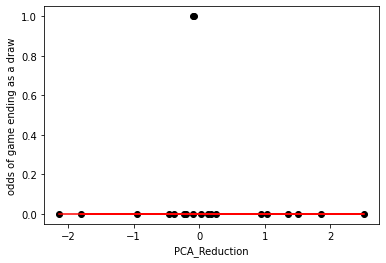

In [366]:
plt.scatter(pcaX1_test, qualityX1_test, color = 'black')
plt.plot(pcaX1_test, quality_predX1, color = 'red')
plt.ylabel('odds of game ending as a draw')
plt.xlabel('PCA_Reduction')
plt.show()

#### 8. Polynomial Regression 

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [359]:
X1 = merger['PCA1'].values.reshape(-1, 1)
y1 = merger['Status_y_D'].values

pcaX1_train, pcaX1_test, qualityX1_train, qualityX1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

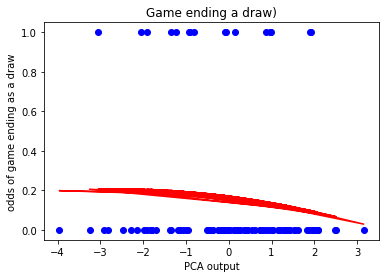

array([-0.14459333])

In [373]:


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X1_poly = poly_reg.fit_transform(X1)


pol_reg = LinearRegression()
pol_reg.fit(X1_poly, y1)

#Visualize the Polynomial Regression results
plt.scatter(X1, y1, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X1, pol_reg.predict(X1_poly), color='red')
plt.title('Game ending a draw)')
plt.xlabel('PCA output')
plt.ylabel('odds of game ending as a draw')
plt.show()

pol_reg.predict(poly_reg.fit_transform([[5.5]]))

### Conclusion

> The dataset provided for logic regression was had inadequate variance

> **Observation**

**Looking at the two graphs, we can clearly see that the logistic regression graph has given us way better results than the polynomial one.**

**Using the polynomial graph it becomes easier to draw meaningful conclusion from it. However, the curve is not passing through any of points as we'd want hence we can say that this graph is not fully optimized.**

### Conclusion

**Logistic regression is good at predicting the descrete data but can do very well with continous data.**




In [ ]:
# Reviewing the Solution 
#
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from stats.models.formula.api import ols

**Therefore, for us to choose an optimal model the model needs to have a low bias and a low varinace.That is to say the model should not capture too many data points and at the same time its should not capture very few data points.** 
